In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
%matplotlib inline
import scipy.stats as norm
import seaborn as sns

In [172]:
df=pd.read_csv('cardio_train.csv',sep=';')

In [173]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [174]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [176]:
u = df[['age']].to_numpy().astype('U5').view('U1').astype(int)

df=df.join(pd.DataFrame(u).rename(columns=lambda c: f'x{c+1}'))

In [177]:
df['year']=df['x4'].astype('str')+df['x5'].astype('str')
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,x1,x2,x3,x4,x5,year
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,2,2,4,6,9,69


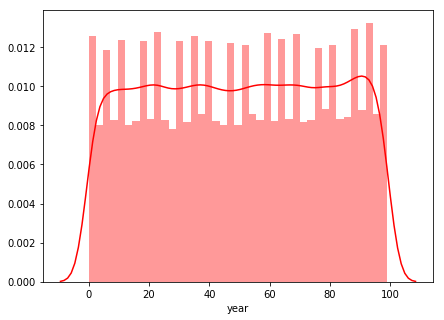

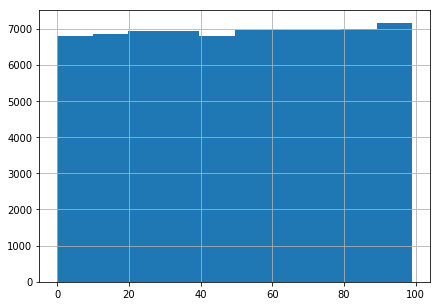

In [178]:
df['year']=df['year'].astype('int')
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['year'], color = 'r');
fig, axe = plt.subplots(figsize = [7, 5])
df['year'].hist(bins=10)

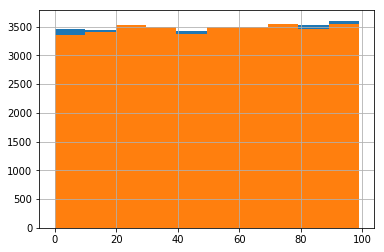

In [179]:
df[df.cardio==1].year.hist(bins=10)
df[df.cardio==0].year.hist(bins=10);


In [180]:
df=df.drop(['x1', 'x2', 'x3', 'x4','age', 'x5'],axis=1)
df['year']=df['year'].astype('int')

In [181]:
conditions = [
    (df['year'] < 20),
    (df['year'] > 20)
    ]

# create a list of the values we want to assign for each condition
values = [20-df.year,100-df.year+20]

# create a new column and use np.select to assign values to it using our lists as arguments
df['AGE'] = np.select(conditions, values)

In [182]:
df.head(4)
df=df.drop(['year'],axis=1)

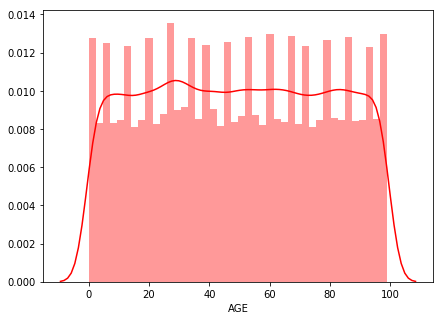

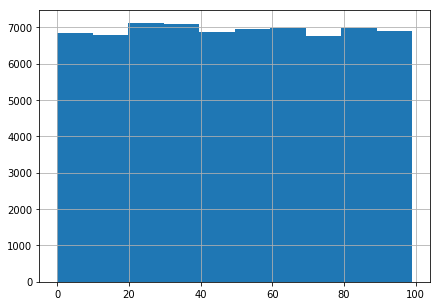

In [183]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['AGE'], color = 'r');
fig, axe = plt.subplots(figsize = [7, 5])
df['AGE'].hist(bins=10)

In [184]:
x=df.copy(deep=True)

In [185]:
y = [ "height", "weight", "ap_hi", "ap_lo"]
def short(x):
    x_std = df.copy(deep=True)
    for column in y:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=short(x)
x_std.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AGE
0,988,1,-1.140991,-0.361737,0.007562,-0.088051,2,2,0,0,1,0,51
1,989,1,-0.166016,-0.222688,-0.121657,-0.140934,1,1,0,0,1,1,72
2,990,1,0.077728,-0.292212,-0.057048,-0.088051,1,1,0,0,1,0,19
3,991,2,0.077728,0.750652,-0.057048,-0.088051,1,1,1,1,1,0,71
4,992,1,-1.140991,-0.848406,-0.057048,-0.088051,1,1,0,0,1,0,27


In [186]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=y, var_name="features", value_name="value", col_level=None)
x_melted

,cardio,features,value
0,0,height,-1.140991
1,1,height,-0.166016
2,0,height,0.077728
3,0,height,0.077728
4,0,height,-1.140991
5,0,height,-0.044144
6,0,height,-0.287888
7,1,height,-0.409760
8,0,height,-0.897247
9,1,height,-0.775375


cardio        int64
features     object
value       float64
dtype: object

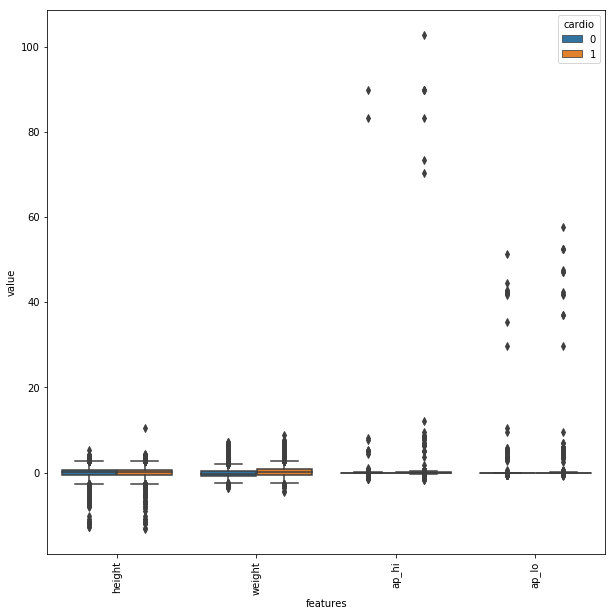

In [187]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)
x_melted.dtypes

In [188]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = df[each].quantile(0.25)
    Q3 = df[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [189]:
ap_hi_filter = (df["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (df["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = df[outlier_filter]
x_outliers["cardio"].value_counts()

1    1999
0     385
Name: cardio, dtype: int64

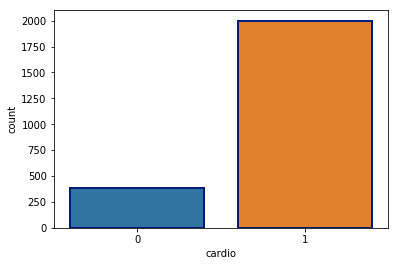

In [190]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

In [191]:
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200) )
print("There is {} outlier".format(df[out_filter]["cardio"].count()))

There is 983 outlier


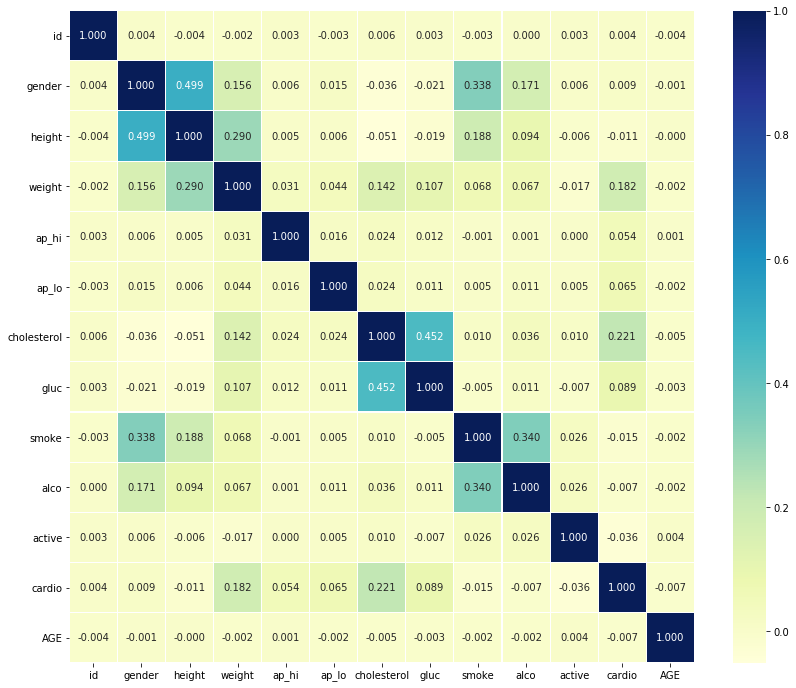

In [192]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,fmt=".3f",cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

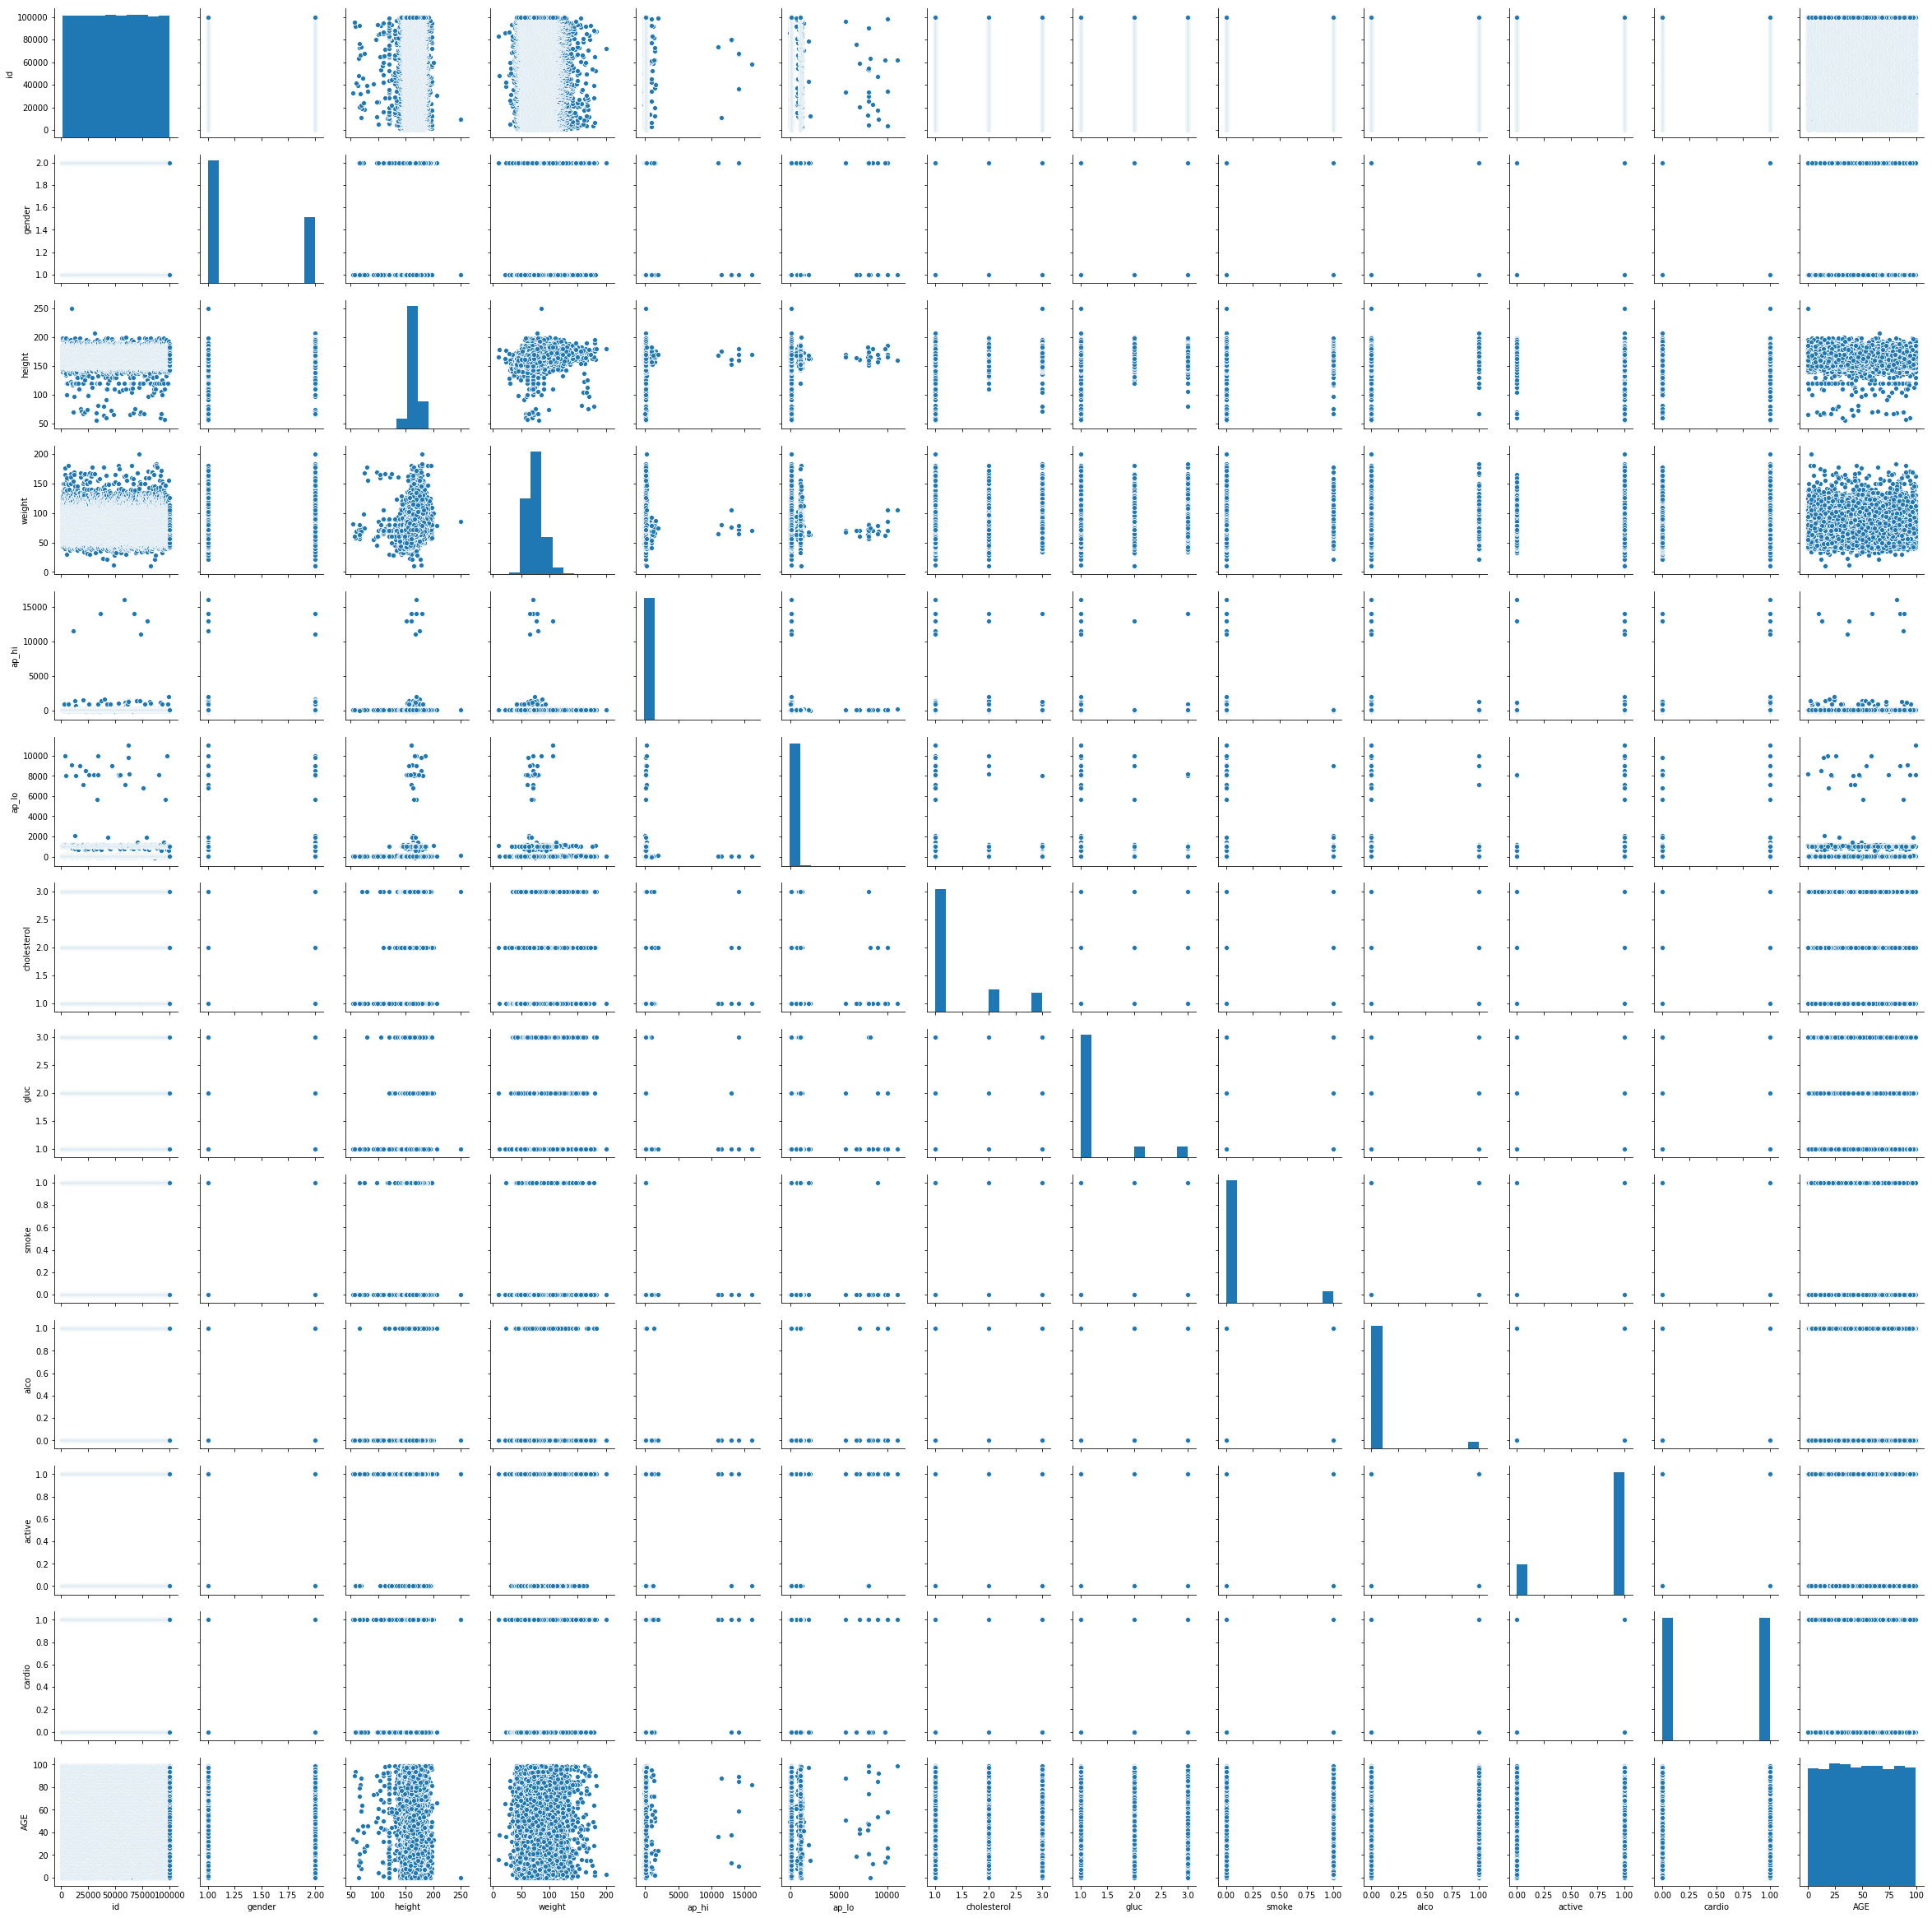

In [193]:
sns.pairplot(df)

In [202]:
def BMI(w,h):
    return w/(h**2)

In [203]:
df["bmi"] = df["weight"]/ (df["height"]/100)**2

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.007392
Kurtosis: -1.193248
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 7.773791
Kurtosis: 223.134929


(None, None, None)

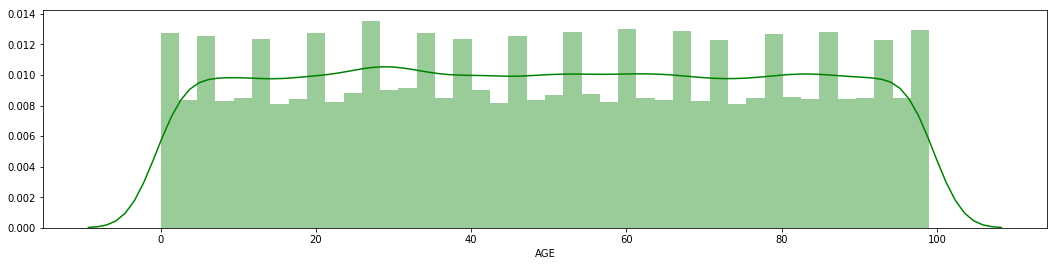

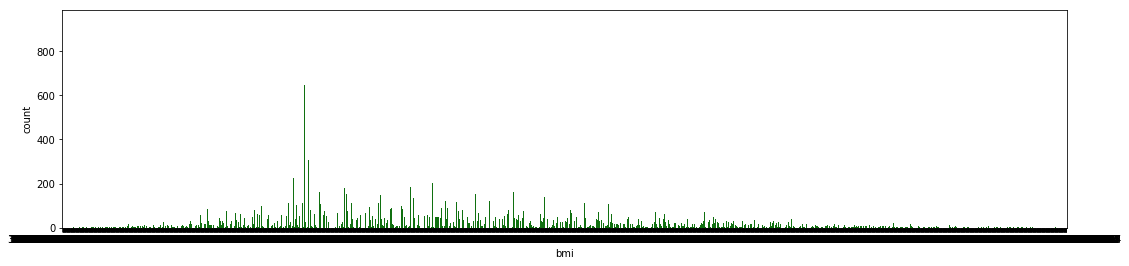

In [204]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['AGE'],color='g')),print("Skewness: %f" % df['AGE'].skew()),print("Kurtosis: %f" % df['AGE'].kurt())
plt.figure(figsize=(18,4))
print(sns.countplot(df['bmi'],color='g')),print("Skewness: %f" % df['bmi'].skew()),print("Kurtosis: %f" % df['bmi'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 2.907579
Kurtosis: 6.454200
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 3.951845
Kurtosis: 13.617472


(None, None, None)

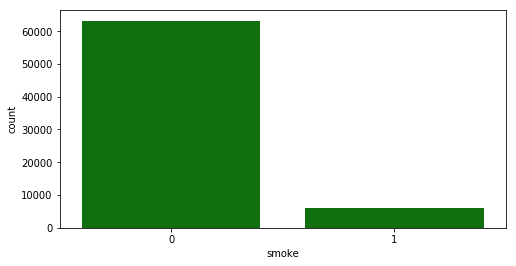

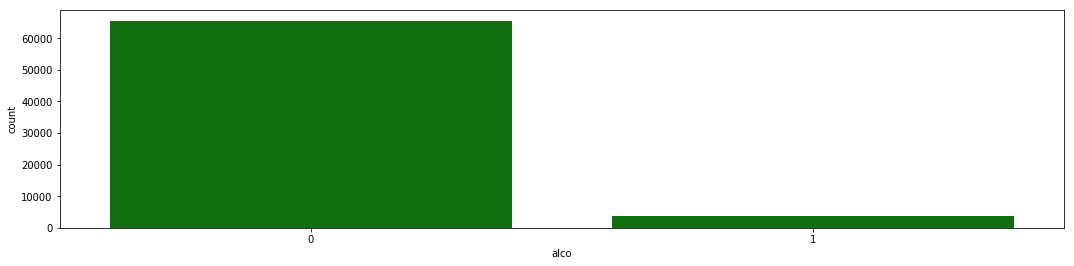

In [197]:
plt.figure(figsize=(8,4))
print(sns.countplot(df['smoke'],color='g')),print("Skewness: %f" % df['smoke'].skew()),print("Kurtosis: %f" % df['smoke'].kurt())
plt.figure(figsize=(18,4))
print(sns.countplot(df['alco'],color='g')),print("Skewness: %f" % df['alco'].skew()),print("Kurtosis: %f" % df['alco'].kurt())

In [205]:
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AGE,bmi
0,988,1,155,69.0,130,80,2,2,0,0,1,0,51,28.720083
1,989,1,163,71.0,110,70,1,1,0,0,1,1,72,26.722873
2,990,1,165,70.0,120,80,1,1,0,0,1,0,19,25.711662
3,991,2,165,85.0,120,80,1,1,1,1,1,0,71,31.221304
4,992,1,155,62.0,120,80,1,1,0,0,1,0,27,25.806452


In [199]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

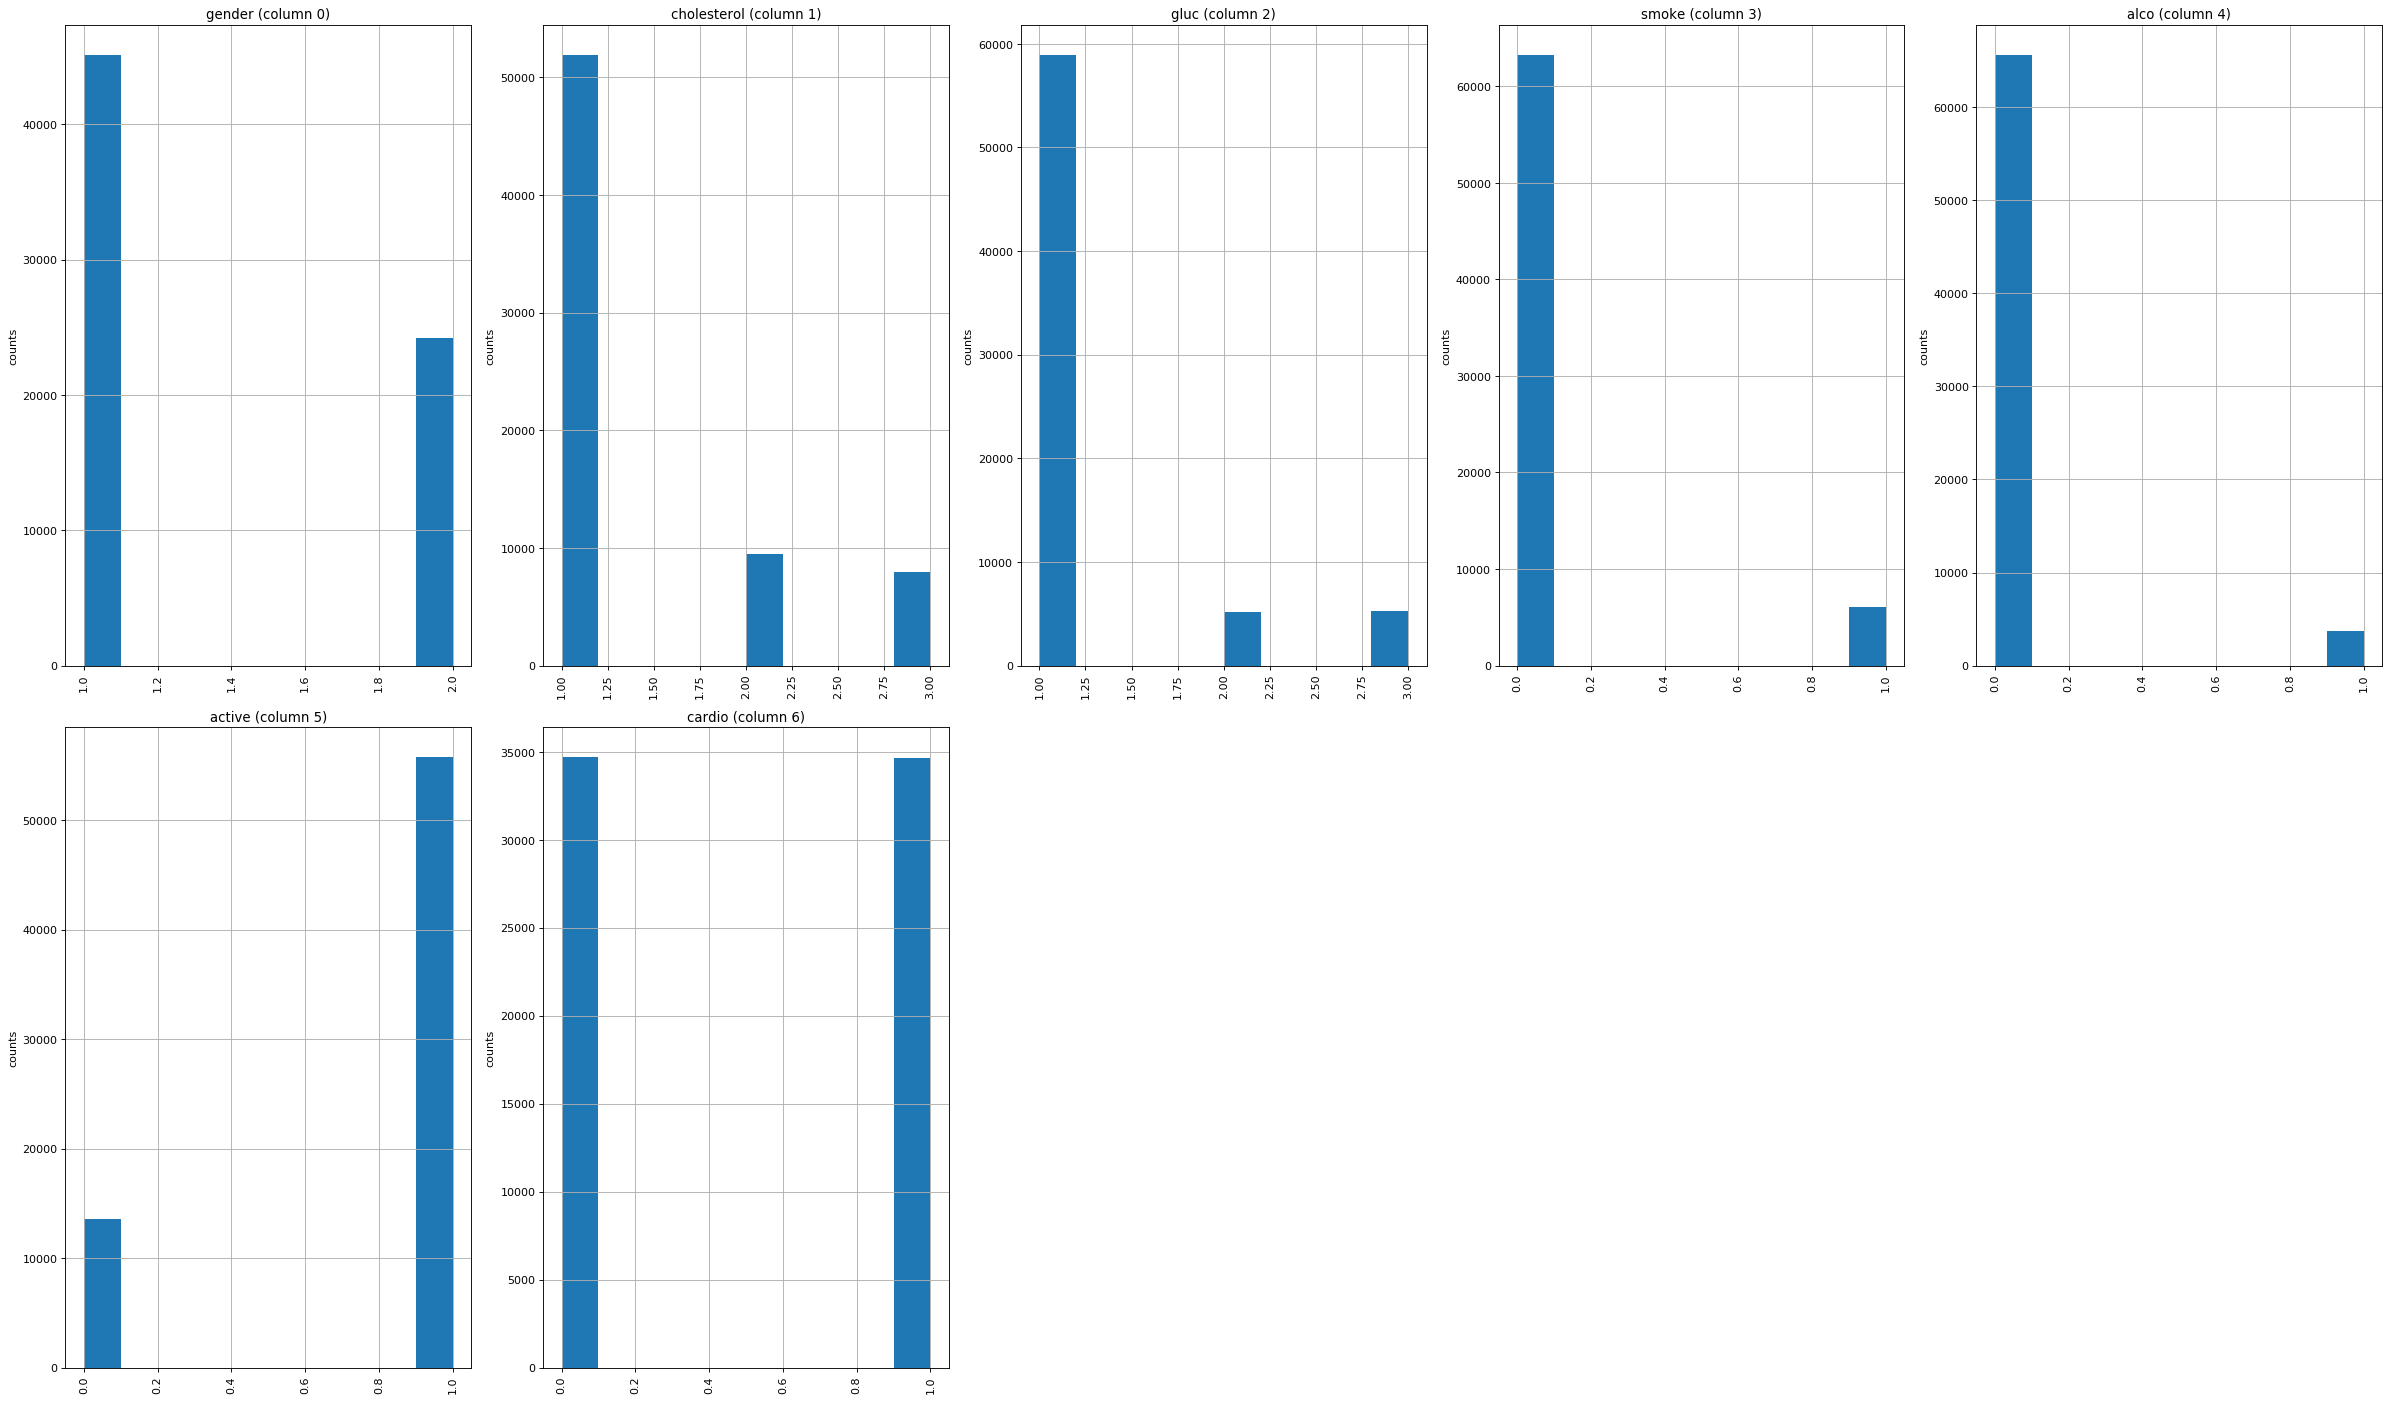

In [200]:
plotPerColumnDistribution(df, 10, 5)

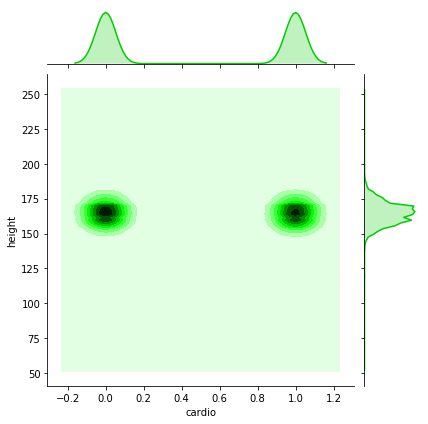

In [207]:
sns.jointplot(df.cardio,df.height, color="#00cc00",kind='kde')#density plot

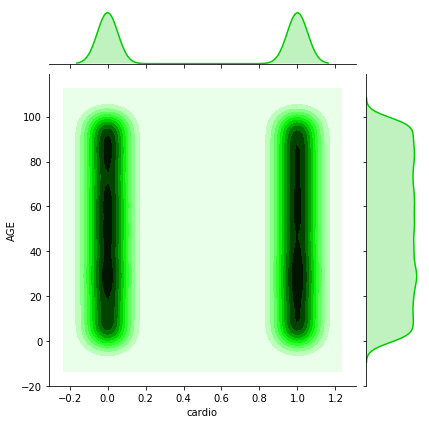

In [208]:
sns.jointplot(df.cardio,df.AGE, color="#00cc00",kind='kde')#density plot

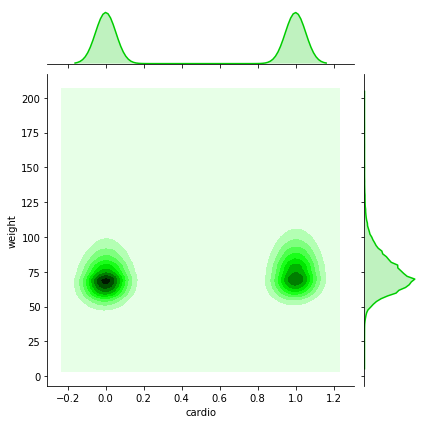

In [209]:
sns.jointplot(df.cardio,df.weight, color="#00cc00",kind='kde')#density plot

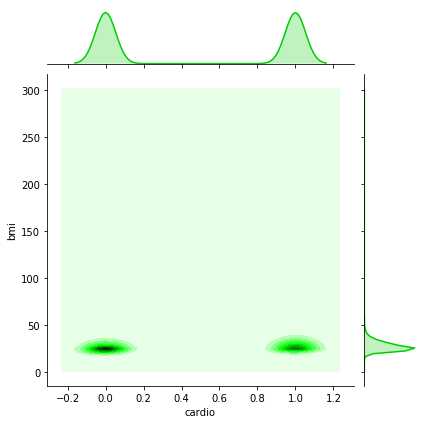

In [210]:
sns.jointplot(df.cardio,df.bmi, color="#00cc00",kind='kde')#density plot

(array([0, 1]), <a list of 2 Text xticklabel objects>)

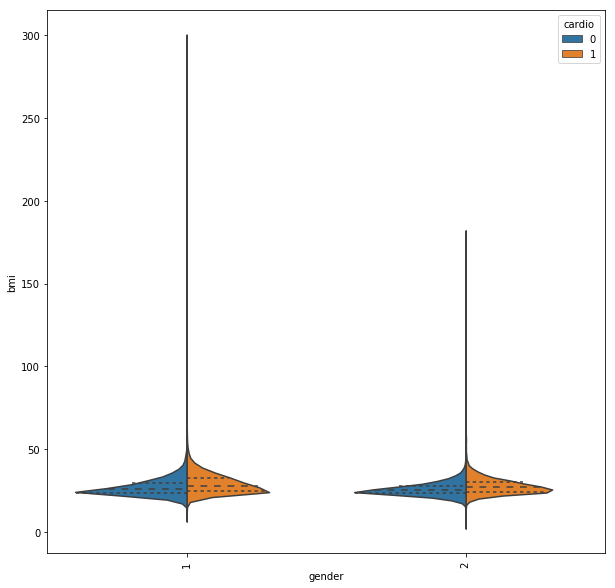

In [211]:
from sklearn.preprocessing import StandardScaler
x_std = short(x)

data = pd.melt(x_std,id_vars="cardio",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="bmi", hue="cardio", data=df,split=True, inner="quart")
plt.xticks(rotation=90)

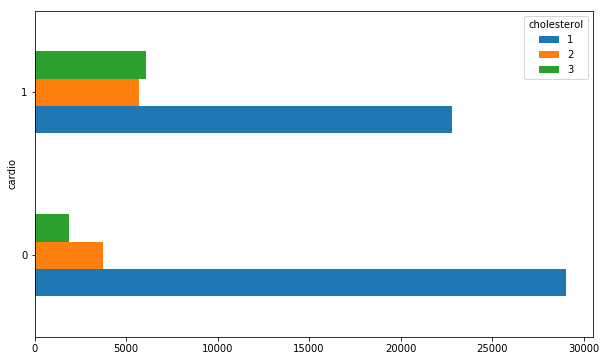

In [212]:
plt.rcParams['figure.figsize'] = (10,6)
pd.crosstab(df.cardio,df.cholesterol).plot(kind='barh');

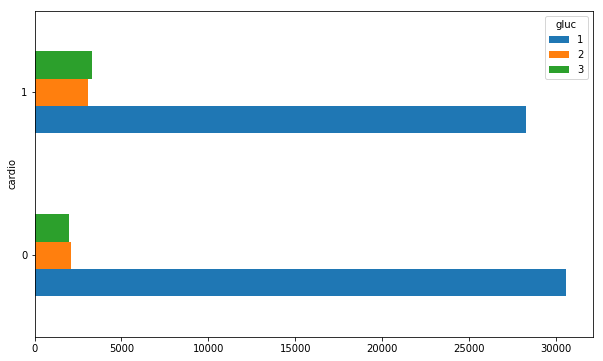

In [213]:
plt.rcParams['figure.figsize'] = (10,6)
pd.crosstab(df.cardio,df.gluc).plot(kind='barh');

Text(0.5, 0, 'Restecg (0 = Normal, 1= above normal ,2=well above normal)')

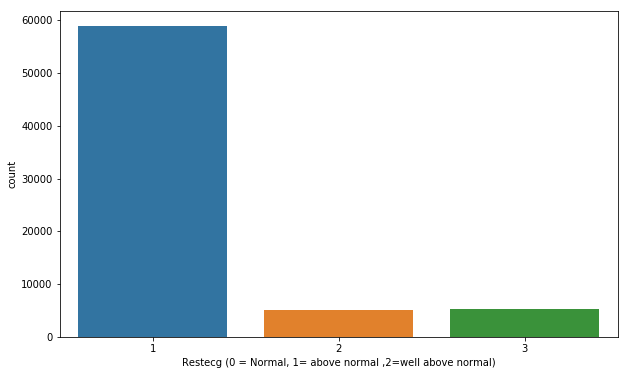

In [214]:
sns.countplot(x = "gluc", data = df)
plt.xlabel("Restecg (0 = Normal, 1= above normal ,2=well above normal)")

In [215]:
y=df['cardio']
y.shape

(69301,)

In [216]:
#df.drop("cardio", axis=1,inplace=True)


In [217]:
df.drop("id", axis=1,inplace=True)
df.head(2)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AGE,bmi
0,1,155,69.0,130,80,2,2,0,0,1,0,51,28.720083
1,1,163,71.0,110,70,1,1,0,0,1,1,72,26.722873


In [218]:
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [226]:
x=df.drop(['cardio'],axis=1)

In [227]:

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [228]:

x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

In [229]:
dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

In [230]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

,Accuracy Score
SVM,0.715100
KNN,0.707885
Random forest,0.706443
Naive bayes,0.618714
Decision tree,0.616478


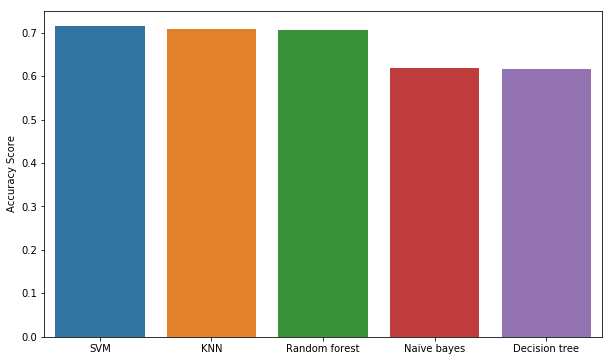

In [231]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
scores_frame

In [232]:
accuracies_random_forest = cross_val_score(estimator=ran, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [233]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.7060966810966811
Random Forest Standart Deviation:  0.004016498025892297
KNN Average accuracy:  0.7079725829725829
KNN Standart Deviation:  0.004674467257882589


In [234]:

grid = {"n_estimators" : np.arange(10,150,10)}

ran_cv = GridSearchCV(ran, grid, cv=3) # GridSearchCV
ran_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 130}
Best score: 0.7079906204906204


In [235]:
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

C:\Users\GT\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tuned hyperparameter n_estimators: {'C': 60, 'penalty': 'l1'}
Best score: 0.7238455988455987


In [236]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

Test accuracy:  0.7246230430704855


C:\Users\GT\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [240]:
y_true = y_test
y_pred = logreg_best.predict(x_test)

In [241]:

cm = confusion_matrix(y_true, y_pred)

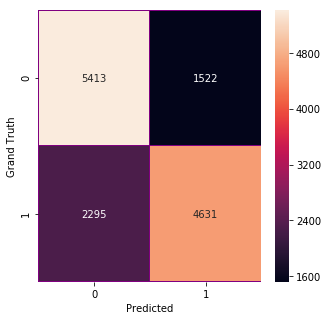

In [242]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()